In [15]:
import pandas as pd
import json

UPLIMIT, DOWNLIMIT = 32, -32
DOWNSAMPLING_RATE = 20

INPUT_FILEPATH, ACTION_NAME, START_FRAME, END_FRAME="02_01.json", "WALK_02_01", 7, 272




In [16]:
############
## FILE LOADING
############

def jsonFromFile(filepath):
    filecontent = open(filepath, encoding="utf8").read() #.replace('\r','').replace('\n','') #.decode('utf-8-sig')
    data = json.loads(filecontent)
    return data

data =jsonFromFile(INPUT_FILEPATH)

In [17]:
############
## FRAME SELECTION
############

df_allbvh=pd.DataFrame(data)
if ((START_FRAME != None) and (END_FRAME != None)):
    mask = ((df_allbvh["frame_id"] >= START_FRAME) & (df_allbvh["frame_id"] <=END_FRAME))
    df_bvh = df_allbvh.loc[mask]
elif ((START_FRAME == None) and (END_FRAME != None)):
    mask = (df_allbvh["frame_id"] <=END_FRAME)
    df_bvh = df_allbvh.loc[mask]
elif ((START_FRAME != None) and (END_FRAME == None)):
    mask = (df_allbvh["frame_id"] >= START_FRAME)
    df_bvh = df_allbvh.loc[mask]
else:
    df_bvh = df_allbvh

In [18]:
# TMP_FILE = "tmp.xlsx"
# def exportDataToExcel (filepath, data):
#     with pd.ExcelWriter(filepath) as writer:
#         for sheetName,values in data.items():
#             pd.DataFrame(values).to_excel(writer, sheet_name=sheetName)
# exportDataToExcel (TMP_FILE, {"data":data})
# df_bvh = pd.read_excel(TMP_FILE, sheet_name='data') #, index_col=0

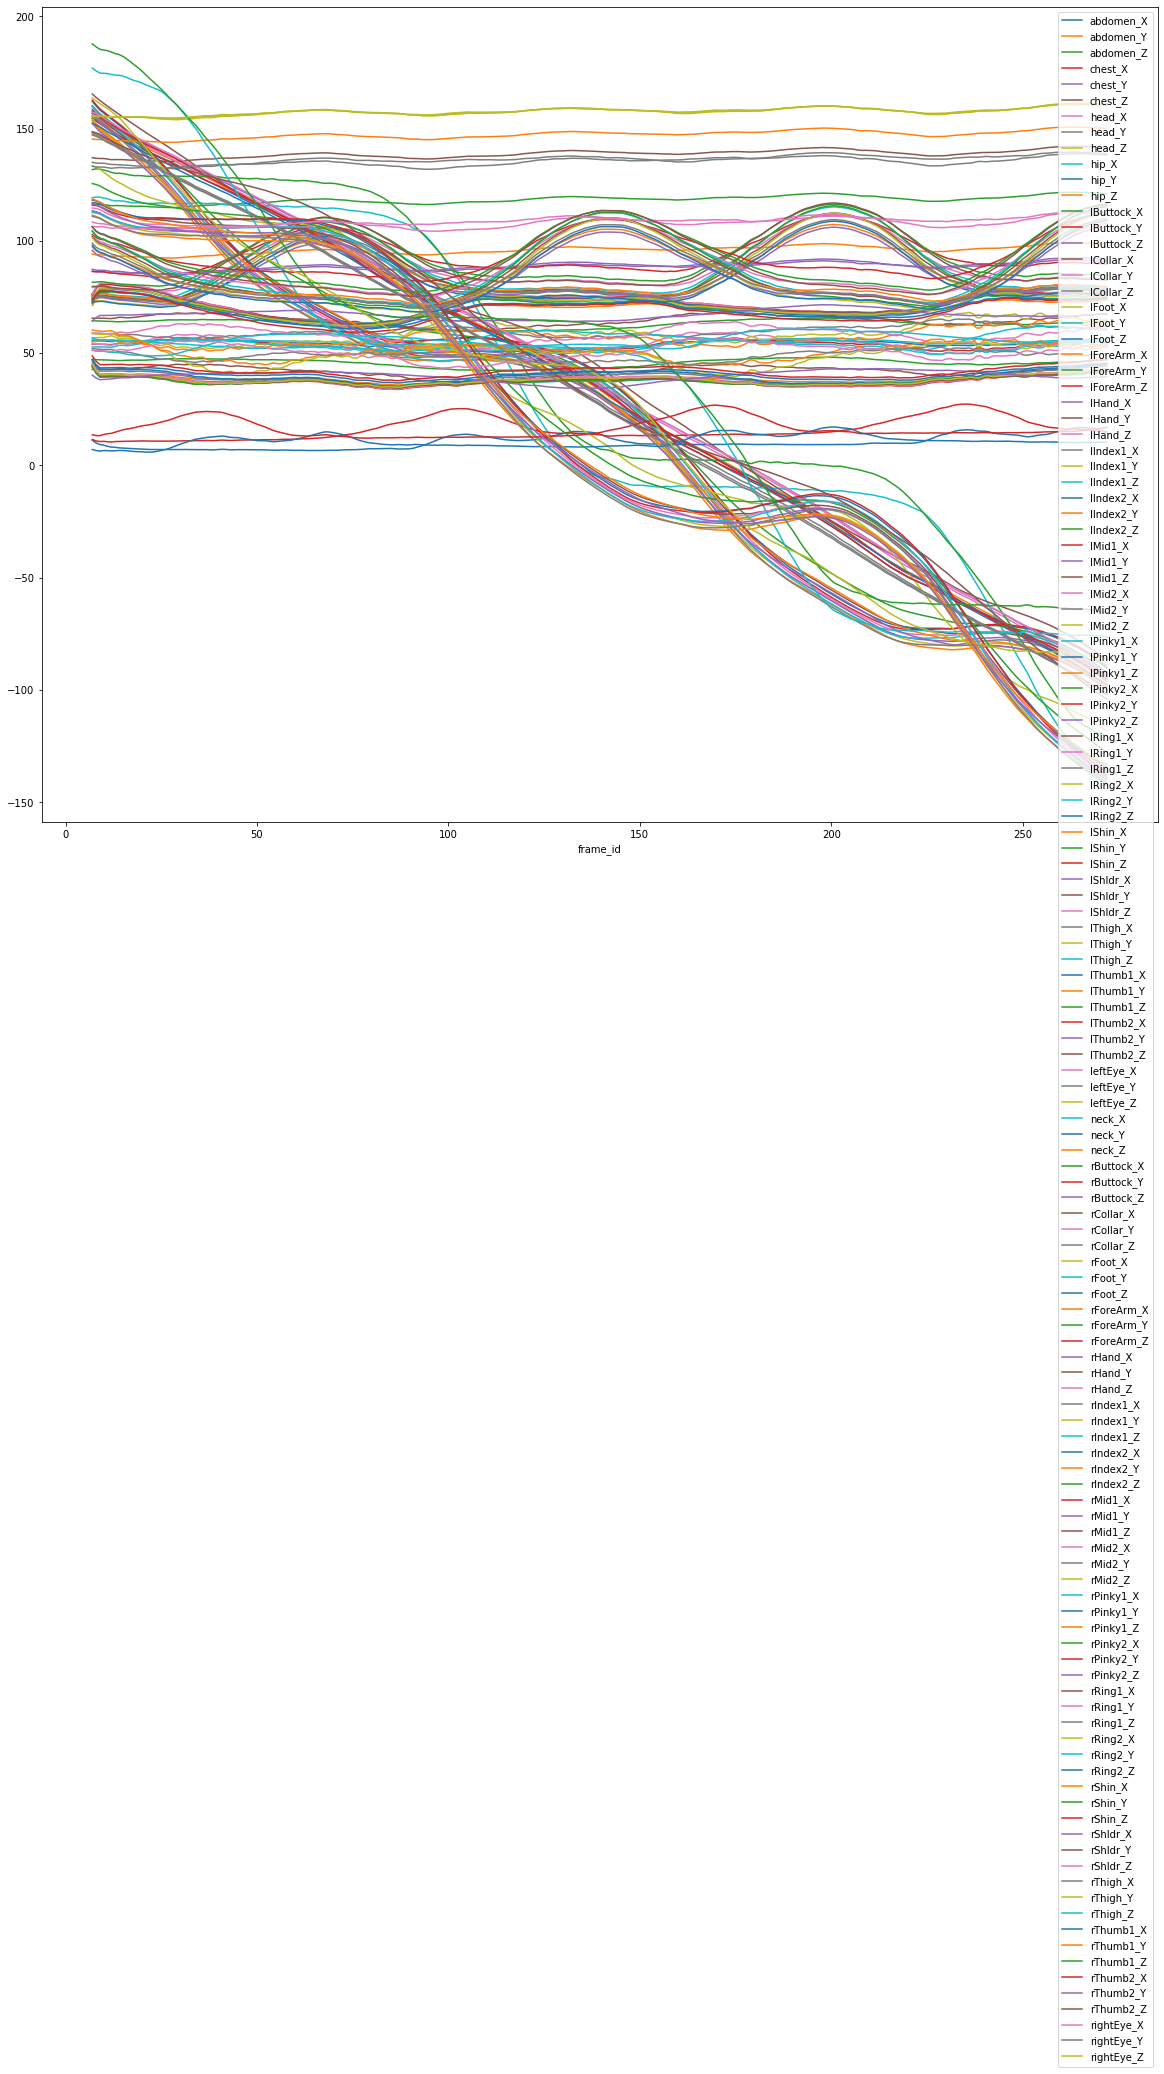

In [19]:
df_bvh.plot(x='frame_id', figsize=(20,15))

In [20]:
############
## SKELETON SIMPLIFYING OFFSETING AND DISPLACEMENT CANCELATION
############
all_bone = pd.DataFrame()
all_bone ["hipX"]= df_bvh["hip_X"]
all_bone ["hipY"]=0
all_bone ["hipZ"]=df_bvh ["hip_Z"]
all_bone ["abdomenX"]= df_bvh ["abdomen_X"]
all_bone ["abdomenY"]= df_bvh ["abdomen_Y"] - df_bvh ["hip_Y"]
all_bone ["abdomenZ"]= df_bvh ["abdomen_Z"]
all_bone ["chestX"]= df_bvh ["chest_X"]
all_bone ["chestY"]= df_bvh ["chest_Y"] - df_bvh ["hip_Y"]
all_bone ["chestZ"]= df_bvh ["chest_Z"]
all_bone ["headX"]= df_bvh ["head_X"]
all_bone ["headY"]= df_bvh ["head_Y"] - df_bvh ["hip_Y"]
all_bone ["headZ"]= df_bvh ["head_Z"]
all_bone ["lShldrX"]  = df_bvh ["lShldr_X"]
all_bone ["lShldrY"]  = df_bvh ["lShldr_Y"] - df_bvh ["hip_Y"]
all_bone ["lShldrZ"]  = df_bvh ["lShldr_Z"]
all_bone ["rShldrX"]  = df_bvh ["rShldr_X"]
all_bone ["rShldrY"]  = df_bvh ["rShldr_Y"] - df_bvh ["hip_Y"]
all_bone ["rShldrZ"]  = df_bvh ["rShldr_Z"]
all_bone ["lForeArmX"]= df_bvh ["lForeArm_X"]
all_bone ["lForeArmY"]= df_bvh ["lForeArm_Y"] - df_bvh ["hip_Y"]
all_bone ["lForeArmZ"]= df_bvh ["lForeArm_Z"]
all_bone ["rForeArmX"]= df_bvh ["rForeArm_X"]
all_bone ["rForeArmY"]= df_bvh ["rForeArm_Y"] - df_bvh ["hip_Y"]
all_bone ["rForeArmZ"]= df_bvh ["rForeArm_Z"]
all_bone ["lThighX"]  = df_bvh ["lThigh_X"]
all_bone ["lThighY"]  = df_bvh ["lThigh_Y"] - df_bvh ["hip_Y"]
all_bone ["lThighZ"]  = df_bvh ["lThigh_Z"]
all_bone ["rThighX"]  = df_bvh ["rThigh_X"]
all_bone ["rThighY"]  = df_bvh ["rThigh_Y"] - df_bvh ["hip_Y"]
all_bone ["rThighZ"]  = df_bvh ["rThigh_Z"]
all_bone ["lShinX"]   = df_bvh ["lShin_X"]
all_bone ["lShinY"]   = df_bvh ["lShin_Y"] - df_bvh ["hip_Y"]
all_bone ["lShinZ"]   = df_bvh ["lShin_Z"]
all_bone ["rShinX"]   = df_bvh ["rShin_X"]
all_bone ["rShinY"]   = df_bvh ["rShin_Y"] - df_bvh ["hip_Y"]
all_bone ["rShinZ"]   = df_bvh ["rShin_Z"]
all_bone ["lFootX"]   = df_bvh ["lFoot_X"]
all_bone ["lFootY"]   = df_bvh ["lFoot_Y"] - df_bvh ["hip_Y"]
all_bone ["lFootZ"]   = df_bvh ["lFoot_Z"]
all_bone ["rFootX"]   = df_bvh ["rFoot_X"]
all_bone ["rFootY"]   = df_bvh ["rFoot_Y"] - df_bvh ["hip_Y"]
all_bone ["rFootZ"]   = df_bvh ["rFoot_Z"]

In [21]:
############
## ANIMATION DOWNSAMPLING
############
all_bone['ts']=pd.date_range('1973-09-30', periods=len(all_bone), freq='S')
res_bones=all_bone.set_index('ts').resample('%dS'%(DOWNSAMPLING_RATE)).mean()
nb_frame=len(res_bones)

In [22]:
############
## SKELETON BOX-RESIZING AND CENTERING
############

maxH = max(res_bones.filter(regex=(".*Z")).max())
minH = min(res_bones.filter(regex=(".*Z")).min())
midH = res_bones["hipZ"].mean()
midX = res_bones["hipX"].mean()
ratio = (maxH-minH)/(UPLIMIT-DOWNLIMIT)
#print (minH, midH, maxH, ratio)

In [23]:

res_bones["hipX"]      =(res_bones["hipX"]-midX)/ratio
res_bones["hipY"]      =0
res_bones["hipZ"]      =(res_bones["hipZ"]-midH)/ratio
res_bones["abdomenX"]  =(res_bones["abdomenX"]-midX)/ratio
res_bones["abdomenY"]  = res_bones["abdomenY"]/ratio
res_bones["abdomenZ"]  =(res_bones["abdomenZ"]-midH)/ratio
res_bones["chestX"]    =(res_bones["chestX"]-midX)/ratio
res_bones["chestY"]    = res_bones["chestY"]/ratio
res_bones["chestZ"]    =(res_bones["chestZ"]-midH)/ratio
res_bones["headX"]     =(res_bones["headX"]-midX)/ratio
res_bones["headY"]     = res_bones["headY"]/ratio
res_bones["headZ"]     =(res_bones["headZ"]-midH)/ratio

res_bones ["lShldrX"]  = (res_bones ["lShldrX"]-midX)/ratio
res_bones ["lShldrY"]  =  res_bones ["lShldrY"]/ratio
res_bones ["lShldrZ"]  = (res_bones ["lShldrZ"]-midH)/ratio
res_bones ["rShldrX"]  = (res_bones ["rShldrX"]-midX)/ratio
res_bones ["rShldrY"]  =  res_bones ["rShldrY"]/ratio 
res_bones ["rShldrZ"]  = (res_bones ["rShldrZ"]-midH)/ratio
res_bones ["lForeArmX"]= (res_bones ["lForeArmX"]-midX)/ratio
res_bones ["lForeArmY"]=  res_bones ["lForeArmY"]/ratio
res_bones ["lForeArmZ"]= (res_bones ["lForeArmZ"]-midH)/ratio
res_bones ["rForeArmX"]= (res_bones ["rForeArmX"]-midX)/ratio
res_bones ["rForeArmY"]=  res_bones ["rForeArmY"]/ratio
res_bones ["rForeArmZ"]= (res_bones ["rForeArmZ"]-midH)/ratio
res_bones ["lThighX"]  = (res_bones ["lThighX"]-midX)/ratio
res_bones ["lThighY"]  =  res_bones ["lThighY"]/ratio
res_bones ["lThighZ"]  = (res_bones ["lThighZ"]-midH)/ratio
res_bones ["rThighX"]  = (res_bones ["rThighX"]-midX)/ratio
res_bones ["rThighY"]  =  res_bones ["rThighY"]/ratio
res_bones ["rThighZ"]  = (res_bones ["rThighZ"]-midH)/ratio
res_bones ["lShinX"]   = (res_bones ["lShinX"]-midX)/ratio
res_bones ["lShinY"]   =  res_bones ["lShinY"]/ratio
res_bones ["lShinZ"]   = (res_bones ["lShinZ"]-midH)/ratio
res_bones ["rShinX"]   = (res_bones ["rShinX"]-midX)/ratio
res_bones ["rShinY"]   =  res_bones ["rShinY"]/ratio
res_bones ["rShinZ"]   = (res_bones ["rShinZ"]-midH)/ratio
res_bones ["lFootX"]   = (res_bones ["lFootX"]-midX)/ratio
res_bones ["lFootY"]   =  res_bones ["lFootY"]/ratio
res_bones ["lFootZ"]   = (res_bones ["lFootZ"]-midH)/ratio
res_bones ["rFootX"]   = (res_bones ["rFootX"]-midX)/ratio
res_bones ["rFootY"]   =  res_bones ["rFootY"]/ratio
res_bones ["rFootZ"]   = (res_bones ["rFootZ"]-midH)/ratio


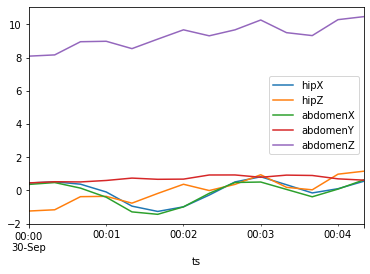

In [24]:
res_bones[["hipX", "hipZ", "abdomenX", "abdomenY", "abdomenZ"]].plot()

In [25]:
res = res_bones.round()

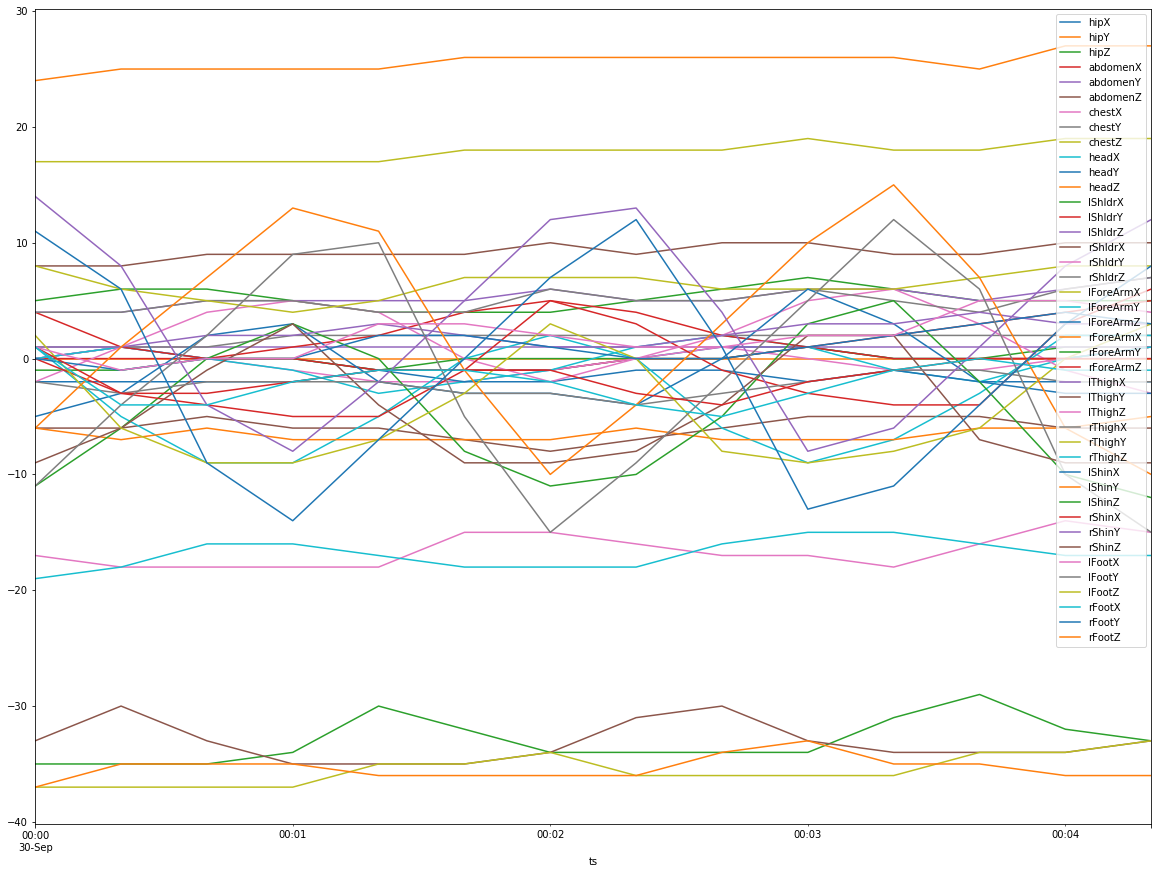

In [29]:
res.plot(figsize=(20,15))

In [27]:
############
## C CODE GENERATION
############
first = True
frame_number = 0
cficontent = ""
for row_index, row in res.iterrows():
    if first:
        cficontent += "#define NB_FRAME_%s %d\n"%(ACTION_NAME,nb_frame)
        cficontent += "char points3D_%s[]={\n// frame %d\n\t\t%d,\t%d,\t%d,\t0 // hip\n"%(ACTION_NAME,frame_number,int(row["hipX"]), int(row["hipY"]), int(row["hipZ"]))
        first = False
    else:
        cficontent += "\n// frame %d\n\t,\t%d,\t%d,\t%d,\t0 // hip\n"%(frame_number,int(row["hipX"]), int(row["hipY"]), int(row["hipZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t1 // abdomen\n"%(int(row["abdomenX"]), int(row["abdomenY"]), int(row["abdomenZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t2 // chest\n"%(int(row["chestX"]), int(row["chestY"]), int(row["chestZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t3 // head\n"%(int(row["headX"]), int(row["headY"]), int(row["headZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t4 // lShldr\n"%(int(row["lShldrX"]), int(row["lShldrY"]), int(row["lShldrZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t5 // rShldr\n"%(int(row["rShldrX"]), int(row["rShldrY"]), int(row["rShldrZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t6 // lForeArm\n"%(int(row["lForeArmX"]), int(row["lForeArmY"]), int(row["lForeArmZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t7 // rForeArm\n"%(int(row["rForeArmX"]), int(row["rForeArmY"]), int(row["rForeArmZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t8 // lThigh\n"%(int(row["lThighX"]), int(row["lThighY"]), int(row["lThighZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t9 // rThigh\n"%(int(row["rThighX"]), int(row["rThighY"]), int(row["rThighZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t10 // lShin\n"%(int(row["lShinX"]), int(row["lShinY"]), int(row["lShinZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t11 // rShin\n"%(int(row["rShinX"]), int(row["rShinY"]), int(row["rShinZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t12 // lFoot\n"%(int(row["lFootX"]), int(row["lFootY"]), int(row["lFootZ"]))
    cficontent += "\t,\t%d,\t%d,\t%d,\t13 // rFoot\n"%(int(row["rFootX"]), int(row["rFootY"]), int(row["rFootZ"]))
    frame_number = frame_number + 1
cficontent += "};\n"
print (cficontent) 

with open ("%s_c.c"%(ACTION_NAME), 'w') as fil:
    fil.write (cficontent)



#define NB_FRAME_WALK_02_01 14
char points3D_WALK_02_01[]={
// frame 0
		0,	0,	-1,	0 // hip
	,	0,	0,	8,	1 // abdomen
	,	0,	1,	17,	2 // chest
	,	0,	-2,	24,	3 // head
	,	5,	4,	4,	4 // lShldr
	,	-6,	-2,	4,	5 // rShldr
	,	8,	1,	-5,	6 // lForeArm
	,	-6,	-11,	0,	7 // rForeArm
	,	1,	-9,	-17,	8 // lThigh
	,	-2,	2,	-19,	9 // rThigh
	,	0,	-6,	-35,	10 // lShin
	,	1,	14,	-33,	11 // rShin
	,	1,	-11,	-37,	12 // lFoot
	,	1,	11,	-37,	13 // rFoot

// frame 1
	,	1,	0,	-1,	0 // hip
	,	0,	1,	8,	1 // abdomen
	,	1,	1,	17,	2 // chest
	,	1,	-2,	25,	3 // head
	,	6,	1,	4,	4 // lShldr
	,	-6,	1,	4,	5 // rShldr
	,	6,	-5,	-3,	6 // lForeArm
	,	-7,	-6,	-3,	7 // rForeArm
	,	1,	-6,	-18,	8 // lThigh
	,	-3,	-6,	-18,	9 // rThigh
	,	-1,	1,	-35,	10 // lShin
	,	-3,	8,	-30,	11 // rShin
	,	-1,	-4,	-37,	12 // lFoot
	,	-4,	6,	-35,	13 // rFoot

// frame 2
	,	0,	0,	0,	0 // hip
	,	0,	1,	9,	1 // abdomen
	,	0,	1,	17,	2 // chest
	,	0,	-2,	25,	3 // head
	,	6,	0,	5,	4 // lShldr
	,	-5,	4,	5,	5 // rShldr
	,	5,	-9,	2,	6 // lForeArm
	,	-6,	

In [28]:
############
## ASM CODE GENERATION
############
first = True
frame_number = 0
sficontent = ""
for row_index, row in res.iterrows():
    if first:
        sficontent += "#define NB_FRAME_%s %d\n"%(ACTION_NAME,nb_frame)
        sficontent += "points3D_%s\n;; frame %d\n\t.byt %d,\t%d,\t%d,\t0 ;; hip\n"%(ACTION_NAME,frame_number, int(row["hipX"]), int(row["hipY"]), int(row["hipZ"]))
        first = False
    else:
        sficontent += "\n;; frame %d\n\t.byt %d,\t%d,\t%d,\t0 ;; hip\n"%(frame_number, int(row["hipX"]), int(row["hipY"]), int(row["hipZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t1 ;; abdomen\n"%(int(row["abdomenX"]), int(row["abdomenY"]), int(row["abdomenZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t2 ;; chest\n"%(int(row["chestX"]), int(row["chestY"]), int(row["chestZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t3 ;; head\n"%(int(row["headX"]), int(row["headY"]), int(row["headZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t4 ;; lShldr\n"%(int(row["lShldrX"]), int(row["lShldrY"]), int(row["lShldrZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t5 ;; rShldr\n"%(int(row["rShldrX"]), int(row["rShldrY"]), int(row["rShldrZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t6 ;; lForeArm\n"%(int(row["lForeArmX"]), int(row["lForeArmY"]), int(row["lForeArmZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t7 ;; rForeArm\n"%(int(row["rForeArmX"]), int(row["rForeArmY"]), int(row["rForeArmZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t8 ;; lThigh\n"%(int(row["lThighX"]), int(row["lThighY"]), int(row["lThighZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t9 ;; rThigh\n"%(int(row["rThighX"]), int(row["rThighY"]), int(row["rThighZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t10 ;; lShin\n"%(int(row["lShinX"]), int(row["lShinY"]), int(row["lShinZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t11 ;; rShin\n"%(int(row["rShinX"]), int(row["rShinY"]), int(row["rShinZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t12 ;; lFoot\n"%(int(row["lFootX"]), int(row["lFootY"]), int(row["lFootZ"]))
    sficontent += "\t.byt %d,\t%d,\t%d,\t13 ;; rFoot\n"%(int(row["rFootX"]), int(row["rFootY"]), int(row["rFootZ"]))
    frame_number = frame_number + 1
print (sficontent)   

with open ("%s_s.s"%(ACTION_NAME), 'w') as fil:
    fil.write (sficontent)



#define NB_FRAME_WALK_02_01 14
points3D_WALK_02_01
;; frame 0
	.byt 0,	0,	-1,	0 ;; hip
	.byt 0,	0,	8,	1 ;; abdomen
	.byt 0,	1,	17,	2 ;; chest
	.byt 0,	-2,	24,	3 ;; head
	.byt 5,	4,	4,	4 ;; lShldr
	.byt -6,	-2,	4,	5 ;; rShldr
	.byt 8,	1,	-5,	6 ;; lForeArm
	.byt -6,	-11,	0,	7 ;; rForeArm
	.byt 1,	-9,	-17,	8 ;; lThigh
	.byt -2,	2,	-19,	9 ;; rThigh
	.byt 0,	-6,	-35,	10 ;; lShin
	.byt 1,	14,	-33,	11 ;; rShin
	.byt 1,	-11,	-37,	12 ;; lFoot
	.byt 1,	11,	-37,	13 ;; rFoot

;; frame 1
	.byt 1,	0,	-1,	0 ;; hip
	.byt 0,	1,	8,	1 ;; abdomen
	.byt 1,	1,	17,	2 ;; chest
	.byt 1,	-2,	25,	3 ;; head
	.byt 6,	1,	4,	4 ;; lShldr
	.byt -6,	1,	4,	5 ;; rShldr
	.byt 6,	-5,	-3,	6 ;; lForeArm
	.byt -7,	-6,	-3,	7 ;; rForeArm
	.byt 1,	-6,	-18,	8 ;; lThigh
	.byt -3,	-6,	-18,	9 ;; rThigh
	.byt -1,	1,	-35,	10 ;; lShin
	.byt -3,	8,	-30,	11 ;; rShin
	.byt -1,	-4,	-37,	12 ;; lFoot
	.byt -4,	6,	-35,	13 ;; rFoot

;; frame 2
	.byt 0,	0,	0,	0 ;; hip
	.byt 0,	1,	9,	1 ;; abdomen
	.byt 0,	1,	17,	2 ;; chest
	.byt 0,	-2,	25,	3 ;; 